In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from scipy import stats

np.random.seed(123)

from pydataset import data

from env import host, user, password

from wrangle_telco import wrangle_telco
from explore import correlation_exploration

## Statistical Distributions

___

### Uniform Distribution 

allows us to model events where the outcome is discrete, and each outcome has an equally likely chance of occurring.

**<font color=red>What You Need</font>**

1. Finite number of outcomes equally likely to happen.

**<font color=orange>So what?</font>**

Allows you to construct a random variable that has an equal opportunity of being any one of the integers in the range you establish using the `low` (inclusive) and `high` (exclusive) below. `size` is an optional parameter, as well.

**Quick Summary**

- In statistics, a uniform distribution is a probability distribution where all outcomes are equally likely.


- Discrete uniform distributions have a finite number of outcomes. A continuous uniform distribution is a statistical distribution with an infinite number of equally likely measurable values.


- The concepts of discrete uniform distribution and continuous uniform distribution, as well as the random variables they describe, are the foundations of statistical analysis and probability theory.

**<font color=green>Now What?</font>**

**Create the distribution:**

`uniform_distribution = stats.randint(low, high, size)`

<code style="background:yellow;color:black">Examples:</code>

- The probability of landing on each side of a die.
- The probability of flipping heads or tails on a coin

**Return a single random variable from this distribution:**

`uniform_distribution.rvs()`

**Return a specific number, n,  of random variables from this distribution:**

`uniform_distribution.rvs(n)`

**Return a matrix, (nrows, ncols),  of random variables from this distribution:**

`uniform_distribution.rvs(n, n, size = (nrows, ncols))`

___

### Binomial Distribution 

allows us to model the number of successes after a fixed number of trials, given a certain probability of success. This distribution assumes that each trial is independent. <font color=purple>(Discrete, fixed # of events.)</font>

**<font color=red>What You Need</font>**

1. There are only two possible mutually exclusive outcomes.
2. There is a fixed number of trials where trials must be independent of each other:

`n = trials`

3. There is a fixed probability of getting a pre-defined success:

`p = p(success)`

**<font color=orange>So what?</font>**

returns the likelihood of successes

**<font color=green>Now What?</font>**

`binomial_distribution = stats.binom(n, p)`

<code style="background:yellow;color:black">Example:</code>

The probability of flipping heads (a pre-defined success) exactly 6 times in 35 flips (trials).

`binomial_distribution = stats.binom(35, .167)`

`binomial_distribution.pmf(6)`

___

### Normal Distribution 

allows us to model a continuous random variable where the further away from the mean you are, the less likely the outcome. Also known as a Gaussian Distribution.

**<font color=red>What You Need</font>**

1. mean
2. standard deviation

**Quick Summary**

- They are symmetric.

- The mean, median, and mode are equal.

- They follow the Empirical rule (68 - 95 - 99.7).

**<font color=orange>So what?</font>**

The Standard Normal Distribution is a normal distribution with a mean of 0 and a standard deviation of 1.

**<font color=green>Now What?</font>**

`normal_distribution = stats.norm(mean, standard deviation)`

<code style="background:yellow;color:black">Example:</code>

The Standard Normal Distribution is a normal distribution with a mean of 0 and standard deviation of 1.

___

### Poisson Distribution 

allows us to model a situation where a certain number of events happen over a specified time interval. It is used to predict the amount of variation from a known average rate of occurrence, within a given time frame. <font color=purple>(Continuous, no fixed number of events. Can go off into infinity.)</font>

**<font color=red>What You Need</font>**

1. A known average rate of occurrence.

**Quick Summary**

- Events must be independent of each other.

- There must be some time interval that separates occurrences of events. (not simultaneous)


**<font color=orange>So what?</font>**

Returns the likelihood of a certain number of events occurring over the time interval/period.

**<font color=green>Now What?</font>**

`poisson_distribution = stats.poisson(average rate)`

<code style="background:yellow;color:black">Examples:</code>

- How many junk emails do I receive in a day? (An event happens, on average, x times per hour.)

- What are the staffing requirements for a company during a peak time? (restaurant, phone bank, etc.) (The number of phone calls received by a call center per hour.)

___

### PDF/PMF

**PDF** (Probability Density Function) / **PMF** (Probability Mass Function) - The probability that your random variable takes on an **EXACT** value.

<img src=https://i.pinimg.com/originals/26/d4/df/26d4df44f322bc49272f29864a6e12c6.png width="300">

`distribution.pdf(probability/continuous)`

`distribution.pmf(value/discrete)`

___

### CDF/PPF

**CDF** (Cumulative Density Function) / **PPF** (Percent Point Function) - The probability that your random variable takes on a value **less than or equal to** a given point.

<img src=https://i.pinimg.com/originals/2f/8a/0b/2f8a0b24a09491199d00a669f0609cd6.png width="300">

`distribution.cdf(value/discrete)`

`distribution.ppf(probability/continuous)`

___

### SF/ISF

**SF** (Survival Function) / **ISF** (Inverse Survival Function) - The probability that your random variable takes on a value **greater than** a given point.

<img src=https://i.pinimg.com/564x/2a/a6/b6/2aa6b68122b2f00c04066c486001271c.jpg width="300">

`distribution.sf(value/discrete)`

`distribution.isf(probability/continuous)`

___

## The Central Limit Theorem

**<font color=red>What's so important about The Central Limit Theorem?</font>**

- If we repeatedly take random samples of the same size from a the same population, and compute the sample mean for each of the samples, the sampling distribution of the sample means will be a normal distribution no matter what the initial distribution of the population was.


- Even if our original population has a skewed distribution, our sampling distribution will be normal if we have a large enough sample!


**<font color=orange>So what?</font>**

- In hypothesis testing, the assumption is that our data is from a normal distribution. In real life, our data is usually **NOT** normally distributed! (Think of the salaries in the Employees database or the home values in the Zillow database.)


**<font color=green>Now What?</font>**

- The Central Limit Theorem and an appropriate sample size allow us to get around the problems of skewed, real-world data distributions, assume our sample data is normally distributed, and run our hypotheses tests.

In [3]:
# n_dice_per_experiment = ncols
ncols = 10

# n_experiments = nrows
nrows = 100

In [4]:
# Create 2-d array of random numbers between 1 and 6 to represent ten dice rolls for each column

dataset = np.random.randint(1, 7, (nrows, ncols))

dataset[:4]

array([[6, 3, 5, 3, 2, 4, 3, 4, 2, 2],
       [1, 2, 2, 1, 1, 2, 4, 6, 5, 1],
       [1, 5, 2, 4, 3, 5, 3, 5, 1, 6],
       [1, 2, 4, 5, 5, 5, 2, 6, 4, 3]])

In [5]:
# Calculate the average for each set of 10 dice rolls

calculated_averages = dataset.mean(axis=1)
calculated_averages

array([3.4, 2.5, 3.5, 3.7, 3.2, 4.7, 3.4, 3.2, 3.4, 3. , 3.7, 3.5, 4. ,
       4.5, 2.9, 2.8, 2.9, 3.8, 3.2, 3.6, 3.4, 4. , 3.5, 3.3, 3.6, 3. ,
       4.3, 3. , 3.3, 3.2, 4.2, 3.9, 3.2, 3.8, 3.6, 3.4, 2.7, 3.4, 3.2,
       3.1, 3.2, 3. , 4.1, 3.3, 3. , 4.1, 3.4, 3.3, 2.9, 3.8, 3.4, 3.6,
       3.9, 3.2, 4.7, 3.8, 3.5, 2.8, 3.8, 4.7, 4.1, 3.5, 2.8, 3.7, 3.4,
       3.7, 3.6, 4.1, 3.6, 3.5, 2.9, 4. , 3.2, 3.4, 4.4, 2.9, 3.2, 3.9,
       1.9, 3. , 3. , 3.5, 3.3, 4.4, 3.4, 4.2, 4.1, 3.2, 3.5, 3.5, 3.8,
       3.1, 3.6, 2.9, 2.9, 4. , 3.3, 3.1, 3.4, 3.6])

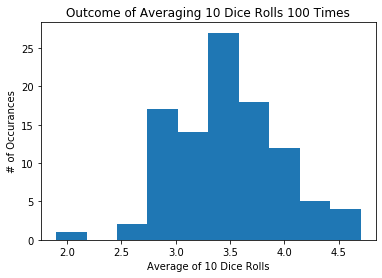

In [8]:
# Visualize the distribution of 100 observations of 10 dice rolls

plt.hist(calculated_averages)
plt.xlabel(f'Average of {ncols} Dice Rolls')
plt.ylabel('# of Occurances')
plt.title(f'Outcome of Averaging {ncols} Dice Rolls {nrows} Times')
plt.show()